# Wczytanie danych

In [17]:
# import os
# import shutil
# import pandas as pd
# from google.colab import drive

# # 1. Montowanie Dysku
# drive.mount('/content/drive', force_remount=True)

# # ---------------------------------------------------------
# # KROK AUTOMATYCZNY: SZUKANIE PLIKU ZIP
# # ---------------------------------------------------------
# print("🔍 Przeszukuję Dysk Google w poszukiwaniu pliku ZIP...")

# # Lista miejsc, gdzie szukamy
# search_paths = [
#     '/content/drive/MyDrive/Colab Notebooks',
#     '/content/drive/MyDrive'
# ]
# target_part = "AnalizaSentymentuDANE" # Szukamy pliku, który ma to w nazwie
# found_zip_path = None

# for path in search_paths:
#     if os.path.exists(path):
#         for file_name in os.listdir(path):
#             if file_name.endswith('.zip') and target_part in file_name:
#                 found_zip_path = os.path.join(path, file_name)
#                 print(f"✅ ZNALEZIONO PLIK: {found_zip_path}")
#                 break
#     if found_zip_path:
#         break

# if not found_zip_path:
#     print("❌ BŁĄD: Nie znaleziono żadnego pliku ZIP z 'AnalizaSentymentu' w nazwie!")
#     print("Sprawdź, czy na pewno wgrałeś plik na Dysk Google.")
#     # Przerywamy działanie, bo nie ma czego rozpakować
#     raise FileNotFoundError("Brak pliku ZIP.")

# # ---------------------------------------------------------
# # KROK 2: TWARDY RESET (USUWANIE STARYCH DANYCH)
# # ---------------------------------------------------------
# data_folder = '/content/Data'

# if os.path.exists(data_folder):
#     print(f"🗑️ Usuwam stary, potencjalnie uszkodzony folder '{data_folder}'...")
#     shutil.rmtree(data_folder)
# else:
#     print("ℹ️ Folder Data jest czysty.")

# # ---------------------------------------------------------
# # KROK 3: ROZPAKOWANIE I WCZYTANIE
# # ---------------------------------------------------------
# print(f"⏳ Rozpakowuję plik: {found_zip_path}")
# # -o oznacza nadpisanie, -q oznacza tryb cichy, -d to folder docelowy
# !unzip -q -o "{found_zip_path}" -d /content/

# # Sprawdzenie, czy się udało
# expected_file = '/content/Data/1_training_data_high_quality.csv'

# if os.path.exists(expected_file):
#     print("✅ Rozpakowanie zakończone sukcesem!")

#     # Wczytanie do Pandas
#     df = pd.read_csv(expected_file)
#     df_to_label = pd.read_csv('/content/Data/2_data_to_be_labeled.csv')

#     print("-" * 40)
#     print(f"📊 SUKCES! Dane gotowe do pracy.")
#     print(f"Zbiór treningowy: {len(df)} wierszy")
#     print(f"Zbiór do etykietowania: {len(df_to_label)} wierszy")
#     print("-" * 40)
# else:
#     print("❌ Plik ZIP został znaleziony, ale po rozpakowaniu folder /content/Data/ jest pusty lub ma inną nazwę.")
#     print("Sprawdź zawartość folderu głównego:")
#     print(os.listdir('/content/'))

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os

# 1. Pełna ścieżka do archiwum ZIP na Dysku Google
# Upewnij się, że masz .zip na końcu ścieżki!
zip_path = '/content/drive/MyDrive/Colab Notebooks/AnalizaSentymentuDANE.zip'

# 2. Nazwa pliku, którego obecność w folderze /content/Data/ świadczy o tym, że rozpakowanie się powiodło
# Zmieniamy ścieżkę na /content/Data/...
CHECK_FILE = '/content/Data/1_training_data_high_quality.csv'

# 3. Sprawdzenie, czy plik już istnieje
if os.path.exists(CHECK_FILE):
    print("✅ Pliki danych już istnieją w /content/Data/. Pomijam rozpakowanie.")
else:
    print("⏳ Pliki nie istnieją. Rozpoczynam rozpakowanie...")

    # Komenda do rozpakowania pliku
    # -d /content/ oznacza, że pliki zostaną rozpakowane do głównego katalogu roboczego Colab
    # Jeżeli wewnątrz ZIPa jest folder 'Data', to stworzy się /content/Data/
    !unzip -q "{zip_path}" -d /content/

    # Dodatkowe sprawdzenie po rozpakowaniu
    if os.path.exists(CHECK_FILE):
        print("✅ Plik został pomyślnie rozpakowany do /content/Data/ i jest gotowy do użycia!")
    else:
        print("❌ Błąd rozpakowania! Sprawdź ścieżkę i nazwę pliku ZIP lub upewnij się, że ZIP zawiera folder Data.")

✅ Pliki danych już istnieją w /content/Data/. Pomijam rozpakowanie.


In [20]:
import pandas as pd

# 1. Wczytanie zbioru danych treningowych wysokiej jakości
df = pd.read_csv('/content/Data/1_training_data_high_quality.csv')

# 2. Wczytanie zbioru danych do etykietowania
df_to_label = pd.read_csv('/content/Data/2_data_to_be_labeled.csv')


In [21]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 required a brand new iphone in order to use it a signific...,neutral
1,here in nz 50 of retailers don’t even have contactless credit card machines like paywave which s...,negative
2,i will forever acknowledge this channel with the help of your lessons and ideas explanations now...,positive
3,whenever i go to a place that doesn’t take apple pay doesn’t happen too often it’s such a drag b...,negative
4,apple pay is so convenient secure and easy to use i used it while at the korean and japanese air...,positive


In [22]:
print('Wielosc', df.shape)

Wielosc (18166, 2)


#wybopr modelu wiaza sie z metoda wektoryzacji
#pltkie - dla BoW/TF-IDF

##Regresja Logistyczna,
"Jest to model liniowy, który doskonale sprawdza się w klasyfikacji tekstu z TF-IDF. Jest szybki i łatwy do interpretacji."
##Wspierane Maszyny Wektorowe (SVM),
"Skuteczny, gdy dane nie są liniowo separowalne. Znajduje optymalną hiperpłaszczyznę oddzielającą klasy."
##Naiwny Klasyfikator Bayesa,
"Bardzo prosty, oparty na rachunku prawdopodobieństwa. Jest szczególnie efektywny dla BoW, zakładając niezależność słów."

#głebokie - dla Word Embeddings

##Sieci Rekurencyjne (LSTM/GRU),
"Są zaprojektowane do przetwarzania sekwencji (tekstu). LSTM (Long Short-Term Memory) jest standardem, ponieważ skutecznie zapamiętuje zależności na długim dystansie w zdaniu."
##Sieci Konwolucyjne (CNN),
"Używane są do identyfikacji kluczowych wzorców frazowych (np. ""był niesamowicie zły""). Działają na tekście jak na jednowymiarowym obrazie."
##Proste Sieci Gęste (Dense Neural Networks),
"Możesz spłaszczyć (flatten) wektory słów lub użyć średniej z nich i przepuścić je przez prostą sieć neuronową. Jest to jednak mniej dokładne niż LSTM/CNN, ponieważ tracisz kolejność słów."

#Transfer Learning (Transformery)

##"BERT, RoBERTa, DistilBERT",
"Te modele transformatorowe rozumieją kontekst. Zamiast mapować słowo na wektor, mapują słowo w kontekście zdania na wektor. Model jest następnie dostrajany (fine-tuned) na Twoim specyficznym zadaniu sentymentu (np. na Twoim zbiorze komentarzy YT). Dają najlepsze wyniki."

# Preprocessing

## Mapowanie wartosci na -1 0 1

In [23]:

# ----------------------------------------------------------------------
# Mapowanie wartosci słownych na liczbowe
# ----------------------------------------------------------------------
sentiment_mapping = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# Wyświetlenie wyników
print("--- Po konwersji na wartości liczbowe ---")
print(df[['Sentiment']].head())

print("\n--- Liczba próbek w każdej klaszie ---")
print(df['Sentiment'].value_counts())


--- Po konwersji na wartości liczbowe ---
   Sentiment
0          0
1         -1
2          1
3         -1
4          1

--- Liczba próbek w każdej klaszie ---
Sentiment
 1    11383
 0     4488
-1     2295
Name: count, dtype: int64


## Funkcja czyszczaca dane + lematyzacja pod def text_tokenizer

In [24]:
# StopWords
from spacy.lang.en.stop_words import STOP_WORDS
import re # import biblioteki re, czyli wyrażeń regularnych, które będa użyte do oczyszczenia tesktu
from string import punctuation # punctuation, to zbiór znaków interpunkcyjnych (do usunięcia podczas czyszczenia)

stopwords_set = set(STOP_WORDS)
exclude_words = {'no', 'not', 'never', 'neither', 'nor', 'none', 'cannot'} # Słowa, które CHCESZ zostawić
final_stopwords = list(stopwords_set - exclude_words)


# Deklaracja i definicja funkcji, która będzie czyściła dane
def clean_text(text):
    # 1. Zabezpieczenie: konwersja na string
    text = str(text)
    # 2. Małe litery
    temp = text.lower()
    # 3. Usuwanie cyfr
    #temp = re.sub(r'\d+', '', temp)
    # 4. Usuwanie tagów HTML
    temp = re.sub(r'<[^>]*>', '', temp)
    # 5. Wyciągnięcie emoji na bok (żeby ich nie usunąć w następnym kroku)
    emojis = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', temp)
    # To znaczy: Zamień wszystko co NIE JEST (^) literą a-z ani spacją (\s) na puste miejsce
    temp = re.sub(r'[^a-zA-Z\s]', ' ', temp)
    # 6. Doklejenie emoji z powrotem na koniec tekstu
    # .replace('-', '') usuwa noski z emotikon (np. :-) zmienia na :)) dla ujednolicenia
    temp = temp + ' ' + ' '.join(emojis).replace('-', '')
    # 7. Usunięcie zbędnych spacji (np. podwójnych spacji w środku)
    temp = re.sub(r'\s+', ' ', temp).strip()

    return temp

# Lematyzacja:
import spacy
# Próba wczytania modelu angielskiego.
# Jeśli wyskoczy błąd, kod spróbuje go automatycznie pobrać.
try:
    # disable=['parser', 'ner'] wyłącza zbędne moduły, żeby kod działał szybciej
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
except OSError:
    print("Pobieranie modelu językowego spaCy (en_core_web_sm)...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Deklaracja funkcji, która będzie przekazywana do vectorizatora -- w celu oczyszczenia tekstu
def text_tokenizer(text):
    cleaned_text = clean_text(text)

    # 2. Przetworzenie przez spaCy (tokenizacja i lematyzacja)
    doc = nlp(cleaned_text)

    # 3. Wyciągnięcie lematów (form podstawowych)
    # token.lemma_ to forma słownikowa (np. "was" -> "be", "dogs" -> "dog")
    # UWAGA: sprawdzamy czy lemat nie jest w stopwords
    lemmas = [token.lemma_ for token in doc]

    # 4. Filtrowanie (stopwords i długość)
    return [lemma for lemma in lemmas if lemma not in final_stopwords and len(lemma) > 2]

## def do podzielenia i transformacji

In [25]:
from sklearn.model_selection import train_test_split

# Deklaracja i definicja funkcji, w której będziemy przetwarzać i dzielić dane
def split_and_vectorize_text(vectorizerName, X, y, test_size = 0.2):

  if vectorizerName == "Tf-idf":
    vectorizer = TfidfVectorizer(tokenizer=text_tokenizer,
    ngram_range=(1, 2),  # Patrz na pojedyncze słowa ORAZ pary słów (np. "not good", "very bad")
    min_df=3,            # Ignoruj słowa/pary, które wystąpiły rzadziej niż 3 razy (szum)
    max_df=0.9           # Ignoruj słowa, które są w 90% dokumentów (są bezużyteczne)
    )
  else:
    print("blad")
    return None


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

  X_train_transform = vectorizer.fit_transform(X_train)
  X_test_transform = vectorizer.transform(X_test)
  print('Wielkość danych po przetworzeniu:', X_train_transform.shape) # To dla trenujących, ale chodzi o to, że widzimy ile powstało kolumn (kolumna, to słowo). W testowych kolumn będzie tyle samo
  return X_train_transform, X_test_transform, y_train, y_test, vectorizer

## Uruchom oczxyszczanie

In [30]:
import joblib
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
test_size = 0.2 # Ustalamy wielkość (procenty) zbioru uczącego

vectorizer = "Tf-idf"

# Uruchamiamy
X_train, X_test, y_train, y_test, fitted_vectorizer = split_and_vectorize_text(vectorizer, df['Comment'], df['Sentiment'], test_size)

# ------------serializacja tokenizera------------------

MODEL_DIR = 'serialized_models'
# Utwórz folder, jeśli nie istnieje
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

vectorizer_path = os.path.join(MODEL_DIR, 'tfidf_vectorizer.joblib')

# Zapisanie wytrenowanego wektoryzatora
joblib.dump(fitted_vectorizer, vectorizer_path)

print(f"✅ Wytrenowany wektoryzator został zapisany do: {vectorizer_path}")
print("Teraz możesz wczytać ten plik w innym projekcie za pomocą joblib.load().")

Wielkość danych po przetworzeniu: (14532, 13936)
✅ Wytrenowany wektoryzator został zapisany do: serialized_models/tfidf_vectorizer.joblib
Teraz możesz wczytać ten plik w innym projekcie za pomocą joblib.load().


## Wizualizacja danych

Rozpoczynam wizualizację danych (redukcja wymiarów)...


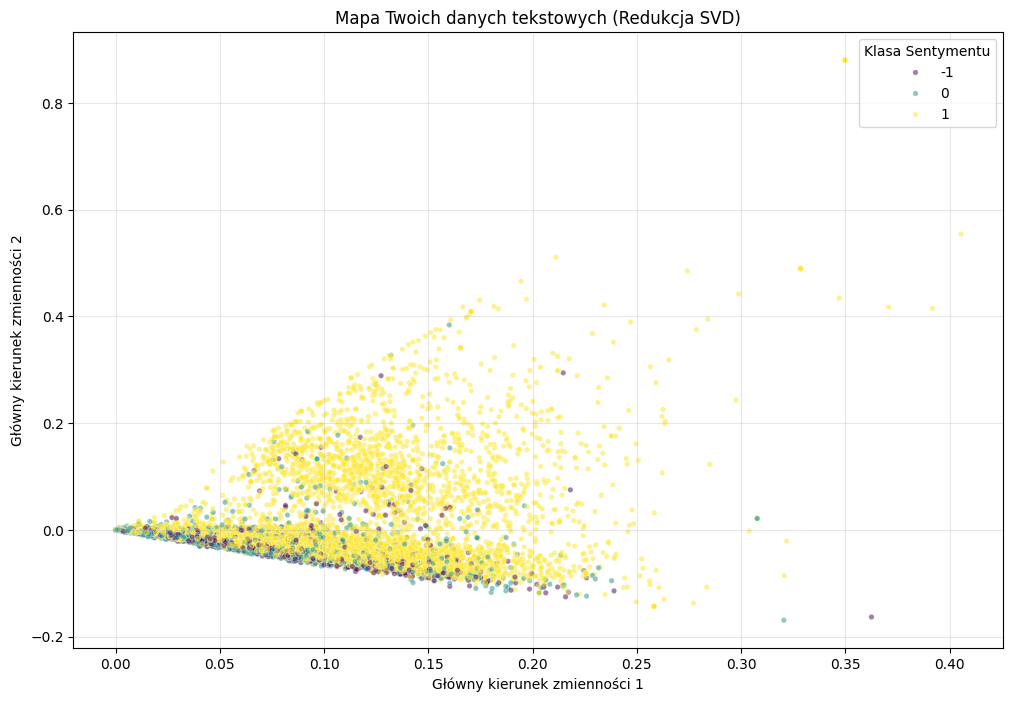

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import TruncatedSVD # Najlepsza metoda dla tekstu (TF-IDF)

print("Rozpoczynam wizualizację danych (redukcja wymiarów)...")

# 1. Redukcja wymiarów: Zgniatamy tysiące słów do 2 wymiarów (X i Y)
# Używamy TruncatedSVD, bo działa na macierzach rzadkich (które masz w X_train)
svd = TruncatedSVD(n_components=2, random_state=42)
X_train_2d = svd.fit_transform(X_train)

# 2. Przygotowanie danych do wykresu
# Tworzymy tymczasową ramkę danych.
# WAŻNE: Resetujemy indeksy w y_train, żeby pasowały do tablicy X_train_2d
df_vis = pd.DataFrame(data=X_train_2d, columns=['Component 1', 'Component 2'])
df_vis['Sentyment'] = y_train.reset_index(drop=True)

# 3. Rysowanie wykresu
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_vis,
    x='Component 1',
    y='Component 2',
    hue='Sentyment',      # Kolorowanie według klasy (-1, 0, 1)
    palette='viridis',    # Zestaw kolorów
    alpha=0.5,            # Przezroczystość (żeby widzieć zagęszczenia)
    s=15                  # Rozmiar kropki
)

plt.title('Mapa Twoich danych tekstowych (Redukcja SVD)')
plt.xlabel('Główny kierunek zmienności 1')
plt.ylabel('Główny kierunek zmienności 2')
plt.legend(title='Klasa Sentymentu')
plt.grid(True, alpha=0.3)
plt.show()

# Eksploracja danych i uzyskane wyniki

## Regresja logistyczna (S kształt)

✅ Model (classifier) został zapisany do: serialized_models/logistic_regression_model.joblib

Wyniki klasyfikacji na zbiotrze testowym:
              precision    recall  f1-score   support

          -1       0.48      0.61      0.54       482
           0       0.56      0.66      0.60       905
           1       0.91      0.79      0.85      2247

    accuracy                           0.73      3634
   macro avg       0.65      0.69      0.66      3634
weighted avg       0.76      0.73      0.75      3634


****************************************



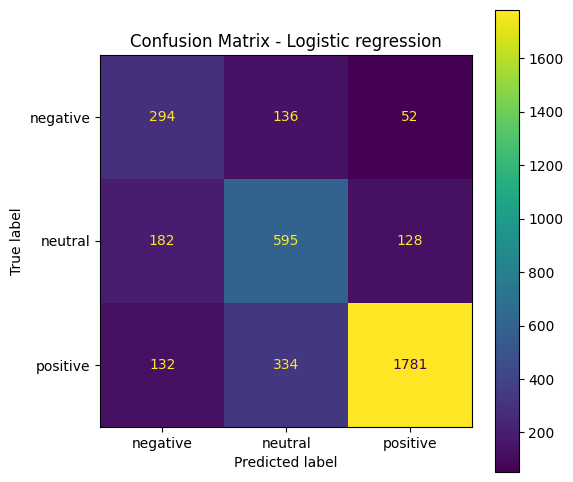

In [32]:
import joblib
import os
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Twoje istniejące kroki trenowania ---
# Uwaga: Zakładamy, że masz dostęp do wytrenowanego vectorizer'a
# z poprzedniego etapu (np. jest to zmienna 'fitted_vectorizer').

# Załóżmy:
# X_train, X_test, y_train, y_test = ...
# fitted_vectorizer = ... (Twój obiekt TfidfVectorizer po fit_transform na danych treningowych)
# ----------------------------------------

classifier = LogisticRegression(class_weight='balanced', random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# --- Dodany kod do serializacji ---

# 1. Definicja folderu i nazw plików
MODEL_DIR = 'serialized_models'
# Utwórz folder, jeśli nie istnieje
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

model_path = os.path.join(MODEL_DIR, 'logistic_regression_model.joblib')
vectorizer_path = os.path.join(MODEL_DIR, 'tfidf_vectorizer.joblib')

# 2. Zapisanie modelu
joblib.dump(classifier, model_path)
print(f"✅ Model (classifier) został zapisany do: {model_path}")

# -------------------------------------

print("\nWyniki klasyfikacji na zbiotrze testowym:")
print(classification_report(y_test, y_pred))
print("\n****************************************\n")

cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['negative','neutral', 'positive']
)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)
plt.title("Confusion Matrix - Logistic regression")
plt.show()



In [33]:
import pandas as pd
import numpy as np

# 1. Musimy upewnić się, że model zwraca prawdopodobieństwa
# Jeśli używasz LogisticRegression - działa od razu.
# Jeśli SVM - musi być zdefiniowany jako SVC(probability=True)
if not hasattr(classifier, "predict_proba"):
    print("Twój model nie obsługuje predict_proba (np. LinearSVC). Użyj LogisticRegression.")
else:
    # 2. Pobieramy prawdopodobieństwa dla zbioru testowego
    # Wynik to macierz: kolumna 0 -> klasa -1, kolumna 1 -> klasa 0, kolumna 2 -> klasa 1
    probas = classifier.predict_proba(X_test)
    predictions = classifier.predict(X_test)

    # 3. Tworzymy DataFrame do analizy błędów
    # Używamy y_test.index, aby wyciągnąć ORYGINALNY tekst z głównego DataFrame (df)
    error_df = pd.DataFrame({
        'Tekst_Komentarza': df.loc[y_test.index]['Comment'], # Pobranie tekstu po indeksach
        'Prawdziwa_Etykieta': y_test,
        'Przewidziana_Etykieta': predictions,
        'Pewnosc_Modelu_Negative': probas[:, 0], # Prawdopodobieństwo klasy -1
        'Pewnosc_Modelu_Positive': probas[:, 2]  # Prawdopodobieństwo klasy 1
    })

    # 4. Wybieramy tylko te wiersze, gdzie model się pomylił
    wrong_preds = error_df[error_df['Prawdziwa_Etykieta'] != error_df['Przewidziana_Etykieta']].copy()

    # 5. Obliczamy "Stopień pomyłki" (jak bardzo model był pewny swojego błędu)
    # Np. Jeśli Etykieta to -1, a model dał 0.99 na Positive, to pomyłka jest ogromna.
    wrong_preds['Stopien_Bledu'] = 0.0

    # Dla pomyłek: Jest -1, a model myślał, że 1
    mask_neg_to_pos = (wrong_preds['Prawdziwa_Etykieta'] == -1) & (wrong_preds['Przewidziana_Etykieta'] == 1)
    wrong_preds.loc[mask_neg_to_pos, 'Stopien_Bledu'] = wrong_preds.loc[mask_neg_to_pos, 'Pewnosc_Modelu_Positive']

    # Dla pomyłek: Jest 1, a model myślał, że -1
    mask_pos_to_neg = (wrong_preds['Prawdziwa_Etykieta'] == 1) & (wrong_preds['Przewidziana_Etykieta'] == -1)
    wrong_preds.loc[mask_pos_to_neg, 'Stopien_Bledu'] = wrong_preds.loc[mask_pos_to_neg, 'Pewnosc_Modelu_Negative']

    # 6. Sortujemy i wyświetlamy "Największe wtopy"
    top_errors = wrong_preds.sort_values(by='Stopien_Bledu', ascending=False).head(40)

    print("\nTOP 20: Komentarze, które mogą być BŁĘDNIE OZNACZONE (Model był pewny innej klasy):")
    pd.set_option('display.max_colwidth', 100) # Żeby widzieć więcej tekstu
    print(top_errors[['Prawdziwa_Etykieta', 'Przewidziana_Etykieta', 'Stopien_Bledu', 'Tekst_Komentarza']])


TOP 20: Komentarze, które mogą być BŁĘDNIE OZNACZONE (Model był pewny innej klasy):
       Prawdziwa_Etykieta  Przewidziana_Etykieta  Stopien_Bledu  \
10145                   1                     -1       0.916760   
11160                   1                     -1       0.898468   
10554                   1                     -1       0.877244   
10953                  -1                      1       0.812705   
16413                   1                     -1       0.774848   
350                     1                     -1       0.774027   
450                    -1                      1       0.773656   
10692                   1                     -1       0.769187   
9005                   -1                      1       0.763017   
12487                   1                     -1       0.760502   
16013                   1                     -1       0.757528   
1422                    1                     -1       0.747443   
12899                   1                   

## SVC

Trwa trenowanie SVM (może chwilę potrwać)...
✅ Model (SVC classifier) został zapisany do: serialized_models/svc_model.joblib

Wyniki klasyfikacji SVM na zbiorze testowym:
              precision    recall  f1-score   support

          -1       0.48      0.59      0.53       482
           0       0.54      0.67      0.60       905
           1       0.91      0.78      0.84      2247

    accuracy                           0.73      3634
   macro avg       0.64      0.68      0.66      3634
weighted avg       0.76      0.73      0.74      3634


****************************************



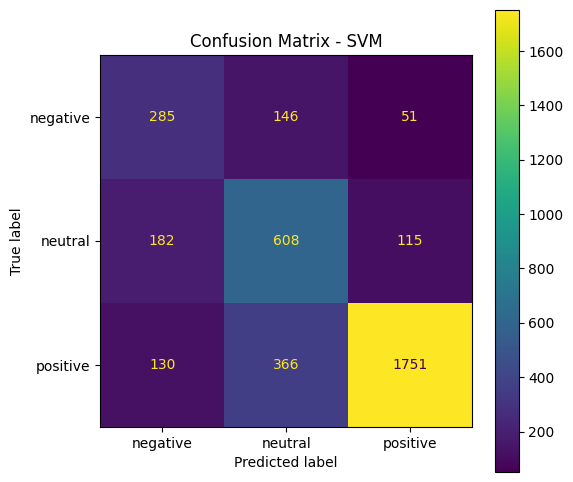

In [34]:
import joblib
import os
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Twoje istniejące kroki trenowania ---
# Uwaga: Zakładamy, że masz dostęp do wytrenowanego vectorizer'a (fitted_vectorizer)
# i że użyłeś go do utworzenia X_train i X_test.
# ----------------------------------------

# Inicjalizacja SVM
classifier = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Trenowanie
print("Trwa trenowanie SVM (może chwilę potrwać)...")
classifier.fit(X_train, y_train)

# Predykcja
y_pred = classifier.predict(X_test)

# --- Dodany kod do serializacji ---

# 1. Definicja folderu i nazw plików
MODEL_DIR = 'serialized_models'
# Utwórz folder, jeśli nie istnieje
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

# Ścieżka dla modelu SVC
model_path = os.path.join(MODEL_DIR, 'svc_model.joblib')

# 2. Zapisanie modelu SVC
joblib.dump(classifier, model_path)
print(f"✅ Model (SVC classifier) został zapisany do: {model_path}")


# -------------------------------------


# Wyniki
print("\nWyniki klasyfikacji SVM na zbiorze testowym:")
print(classification_report(y_test, y_pred))
print("\n****************************************\n")

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['negative','neutral', 'positive']
)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)
plt.title("Confusion Matrix - SVM")
plt.show()

## Naiwna klasyfikacja bayesa

✅ Model (naive) został zapisany do: serialized_models/naive_model.joblib
Wyniki klasyfikacji Naive Bayes na zbiorze testowym:
              precision    recall  f1-score   support

          -1       0.47      0.54      0.50       482
           0       0.59      0.38      0.46       905
           1       0.81      0.90      0.85      2247

    accuracy                           0.72      3634
   macro avg       0.62      0.61      0.61      3634
weighted avg       0.71      0.72      0.71      3634


****************************************



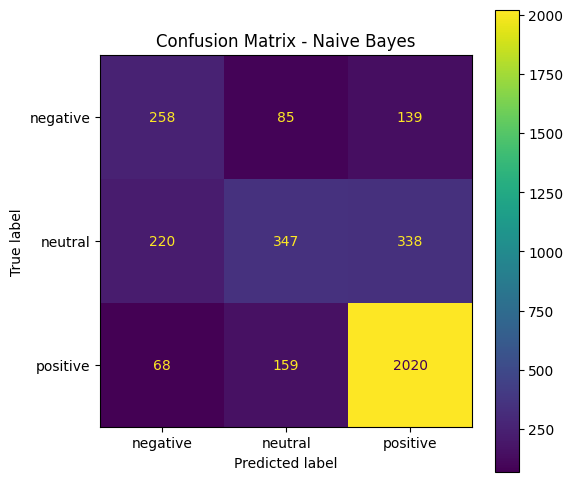

In [35]:
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inicjalizacja Naive Bayes
classifier = ComplementNB()

# Trenowanie (jest bardzo szybkie)
classifier.fit(X_train, y_train)

# Predykcja
y_pred = classifier.predict(X_test)


# --- Dodany kod do serializacji ---

# 1. Definicja folderu i nazw plików
MODEL_DIR = 'serialized_models'
# Utwórz folder, jeśli nie istnieje
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

# Ścieżka dla modelu SVC
model_path = os.path.join(MODEL_DIR, 'naive_model.joblib')

# 2. Zapisanie modelu SVC
joblib.dump(classifier, model_path)
print(f"✅ Model (naive) został zapisany do: {model_path}")


# -------------------------------------

# Wyniki
print("Wyniki klasyfikacji Naive Bayes na zbiorze testowym:")
print(classification_report(y_test, y_pred))
print("\n****************************************\n")

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['negative','neutral', 'positive']
)
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Wizualizacja

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


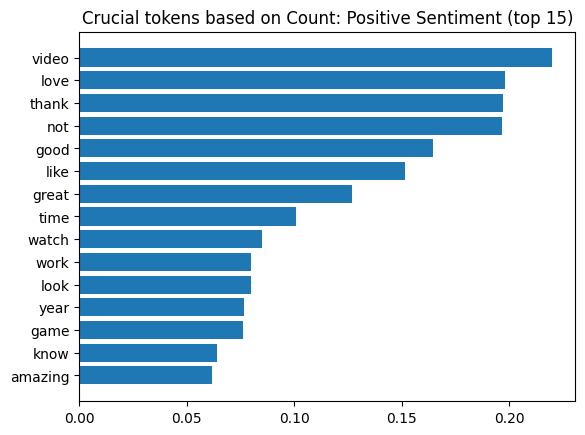

+------------------------------------------------------------+
| Crucial tokens based on Count: Positive Sentiment (top 15) |
+----------------+-------------------------------------------+
|      Term      |                   Weigth                  |
+----------------+-------------------------------------------+
|     video      |             0.219889308618123             |
|      love      |            0.19836598436265404            |
|     thank      |            0.19722393042256758            |
|      not       |             0.196521127997897             |
|      good      |            0.16471931828165176            |
|      like      |            0.15180532372836886            |
|     great      |             0.1271193885618897            |
|      time      |            0.10102784854607667            |
|     watch      |            0.08521479399103857            |
|      work      |             0.080119476412193             |
|      look      |            0.07985592550294233      

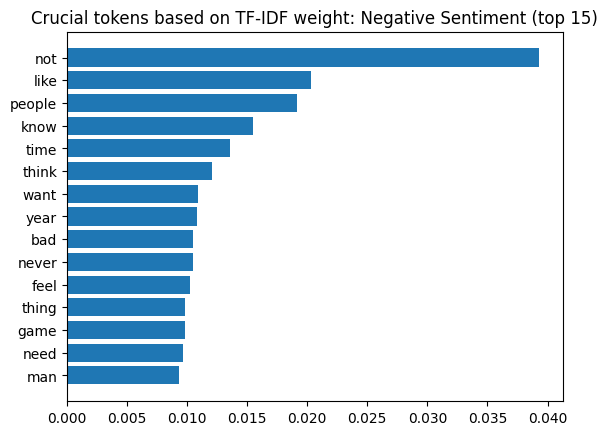

+--------------------------------------------------------------------+
| Crucial tokens based on TF-IDF weight: Negative Sentiment (top 15) |
+----------------+---------------------------------------------------+
|      Term      |                   TF-IDF Weight                   |
+----------------+---------------------------------------------------+
|      not       |                0.039307455211160656               |
|      like      |                0.02028679021114853                |
|     people     |                0.019111248407997015               |
|      know      |                0.015487568860846923               |
|      time      |                0.013573458583676305               |
|     think      |                0.012076734058640123               |
|      want      |                0.010883921980622003               |
|      year      |                0.010789878429553862               |
|      bad       |                0.010516359242837016               |
|     

<Figure size 640x480 with 0 Axes>

In [36]:
# Klasycznie, importowanie bibliotek
import matplotlib.pyplot as plt # Do wykresów
from prettytable import PrettyTable # Do ładnych tabelek

# Definicja i deklaracja funkcji

def aggregate_all_columns(np_matrix, aggregate_type='mean'):
  if aggregate_type == 'sum':
    return np_matrix.sum(axis=0).tolist()[0]
  elif aggregate_type == 'mean':
    return np_matrix.mean(axis=0).tolist()[0]

  raise AttributeError('Undefined aggregare type')

def sort_dict_by_values(x, desc=True):
    return dict(sorted(x.items(), key=lambda item: item[1], reverse=desc))

def create_bow_from_means_and_feature_names(means, feature_names):
    return {token: means[i] for i, token in enumerate(feature_names)}

def calculate_features_weight(X, is_tfidf_mode=True, is_binary_mode=False, aggregate_weigth_type='mean'):
    if is_tfidf_mode:
        vectorizer = TfidfVectorizer(tokenizer=text_tokenizer)
        X_transform = vectorizer.fit_transform(X)
    else:
        vectorizer = CountVectorizer(tokenizer=text_tokenizer, binary=is_binary_mode)
        X_transform = vectorizer.fit_transform(X)

    means_for_features = aggregate_all_columns(X_transform, aggregate_weigth_type)
    bow = create_bow_from_means_and_feature_names(means_for_features, vectorizer.get_feature_names_out())
    return sort_dict_by_values(bow)

def visualize_bow_terms(bow, title, second_column_title='Weigth', top_n=15, pdf_name="fig.pdf"):
    plt.barh(list(bow.keys())[:top_n], list(bow.values())[:top_n])
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show() # To wyświetla wykres tutaj, w programie.
    plt.savefig(pdf_name) # To zapisuje wykres jako plik.
    plt.clf()


# PrettyTable, jak sama nazwa wskazuje -- to do ładnych tabelek :) Nie jest związane z wykresem, ale fajnie wyświetla tabelę.

    table = PrettyTable()

    table.title = title
    table.add_column('Term', list(bow.keys())[:top_n])
    table.add_column(second_column_title, list(bow.values())[:top_n])
    print(table)

##########
#
# Tutaj wywołanie powyższych fukcji, a więc w rzeczywistości tworzenie wykresów i tabel
#
##########

# UWAGA! Trochę to trwa -- cierpliwości

# UWAGA: Upewnij się, że df['Sentiment'] zawiera już wartości LICZBOWE (-1, 0, 1)

top_n = 15
TEXT_COLUMN = 'Comment' # Zmień na 'text' jeśli tak nazywa się kolumna z komentarzami

# ------------------------------------------------
# A. Najważniejsze Tokeny dla Sentymentu POZYTYWNEGO (1)
# ------------------------------------------------

# Filtrujemy ramkę danych dla sentymentu == 1
positive_tokens = calculate_features_weight(
    df.loc[df['Sentiment'] == 1][TEXT_COLUMN], # <-- Zmieniono 'decision' na 'Sentiment' oraz 1 na 'positive'
    is_tfidf_mode=False # Używasz CountVectorizer, bo False jest domyślnie
)

visualize_bow_terms(
    positive_tokens,
    'Crucial tokens based on Count: Positive Sentiment (top ' + str(top_n) + ')',
    top_n=top_n,
    pdf_name="fig_Count_positive.pdf"
)


# ------------------------------------------------
# B. Najważniejsze Tokeny dla Sentymentu NEGATYWNEGO (-1)
# ------------------------------------------------

# Filtrujemy ramkę danych dla sentymentu == -1
negative_tokens = calculate_features_weight(
    df.loc[df['Sentiment'] == -1][TEXT_COLUMN],
    # Zostawiamy domyślny TF-IDF, bo w funkcji nie podano False
    is_tfidf_mode=True
)

visualize_bow_terms(
    negative_tokens,
    'Crucial tokens based on TF-IDF weight: Negative Sentiment (top ' + str(top_n) + ')',
    second_column_title='TF-IDF Weight',
    top_n=top_n,
    pdf_name="fig_TF-IDF_negative.pdf"
)

print("Koniec zadania")
